In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [14]:
iris = datasets.load_iris()

In [15]:
y = iris.target
X = iris.data[:,[0,2]]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [32]:
def plotter_countour(x,y,model):
    #preparation
    color = ["blue", "red", "green", "yellow", "brown", "gray"]
    #min/max
    x1_min = x[:,0].min()-1
    x1_max = x[:,0].max()+1
    x2_min = x[:,1].min()-1
    x2_max = x[:,1].max()+1
    #meshgrid
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,0.02),np.arange(x2_min,x2_max,0.02))
    Z = model.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #countrf
    plt.figure(figsize=(10,10))
    plt.contourf(xx1,xx2,Z,cmap="jet",alpha=0.2)
    #scatter
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y==cl,0],y=x[y==cl,1],color=color[idx],label=f"Class {cl}")
    plt.legend(loc="upper left")

In [30]:
svclass = SVC(C=10.0,kernel="linear")
logreg = LogisticRegression(C=100.0, multi_class="ovr",solver="lbfgs")
rfc = RandomForestClassifier(n_estimators=30, max_depth=3,n_jobs=-1)

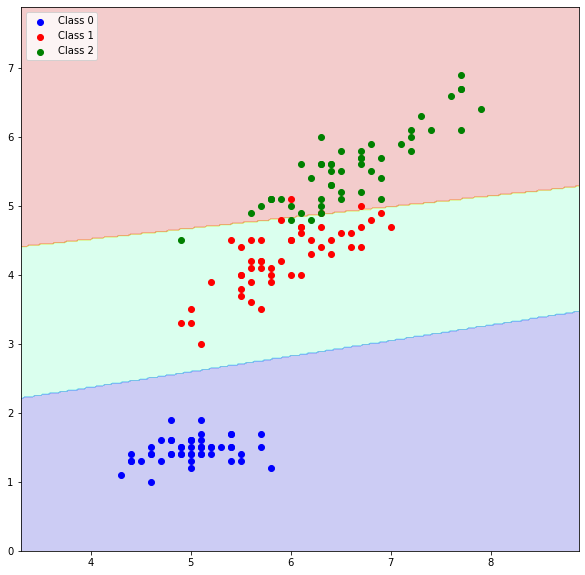

In [33]:
logreg.fit(X_train,y_train)
X_comb = np.vstack((X_train,X_test))
y_comb = np.hstack((y_train,y_test))

plotter_countour(X_comb,y_comb,logreg)

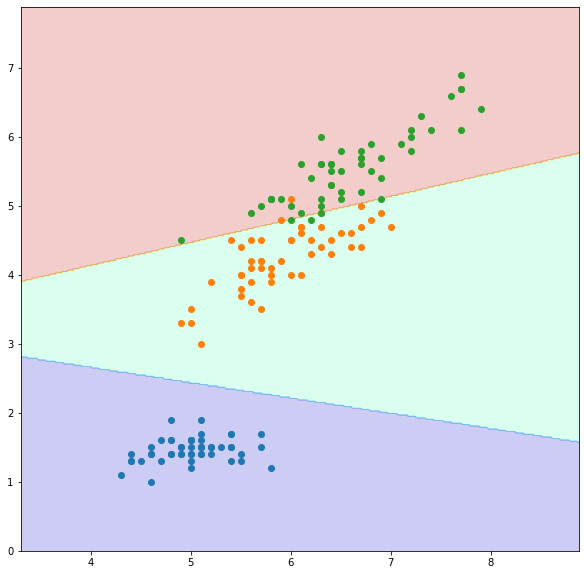

In [22]:
svclass.fit(X_train,y_train)
plotter_countour(X_comb,y_comb,svclass)

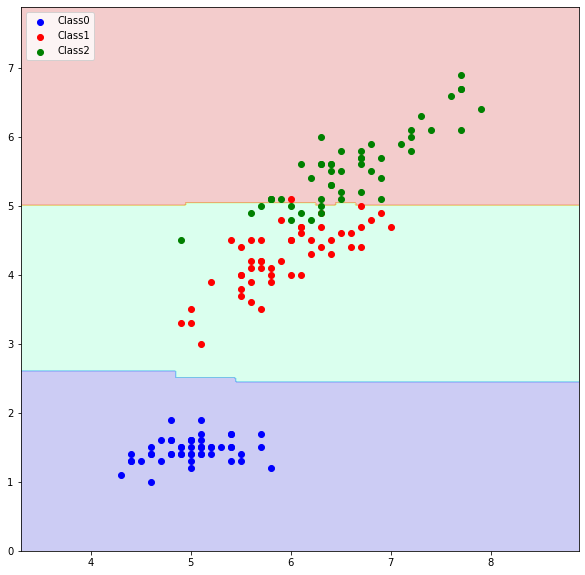

In [31]:
rfc.fit(X_train,y_train)
plotter_countour(X_comb,y_comb,rfc)

In [36]:
from xgboost import XGBClassifier

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:37:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


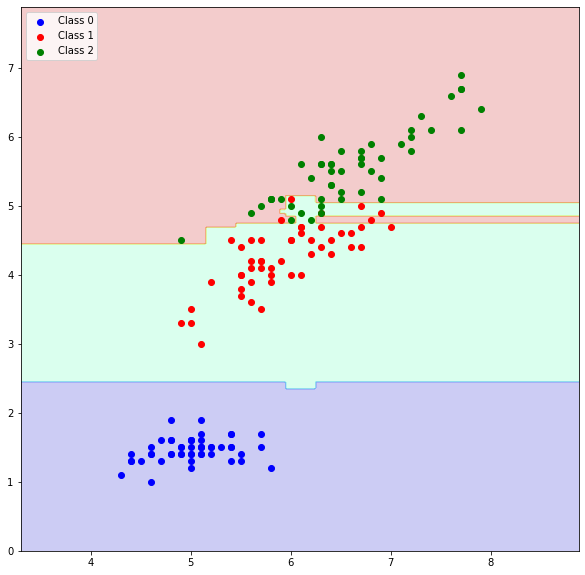

In [40]:
model = XGBClassifier(subsample = 0.7, max_depth = 4)
model.fit(X_train, y_train)
plotter_countour(X_comb,y_comb,model)